# Handwritten Digit Recognition

### Importing dependencies

In [129]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

### Data Collection

In [130]:
mnist_dataset = tf.keras.datasets.mnist

### Train Test Split

In [131]:
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()

In [132]:
type(x_train[0])

numpy.ndarray

In [133]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

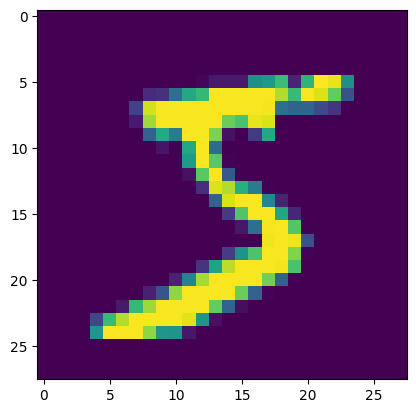

In [134]:
# display image
plt.imshow(x_train[0])
plt.show()

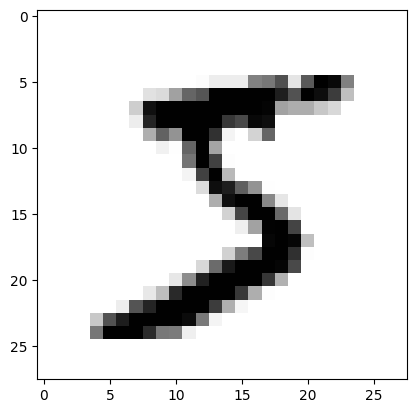

In [135]:
# binary image B & W
plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()

### Normalise

In [136]:
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

In [137]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

### Build NN model

In [138]:
# Sequential model
model = tf.keras.models.Sequential()

# adding layers to model
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

In [139]:
# compile model
model.compile(optimizer = "adam", 
              loss = "sparse_categorical_crossentropy", 
              metrics = ["accuracy"])

In [140]:
# model training
history = model.fit(x_train, y_train, validation_split= 0.1, epochs = 5)

Epoch 1/5
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2782 - accuracy: 0.9191 - val_loss: 0.1385 - val_accuracy: 0.9577
Epoch 2/5
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1158 - accuracy: 0.9642 - val_loss: 0.0916 - val_accuracy: 0.9720
Epoch 3/5
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0780 - accuracy: 0.9755 - val_loss: 0.0851 - val_accuracy: 0.9747
Epoch 4/5
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0567 - accuracy: 0.9820 - val_loss: 0.0756 - val_accuracy: 0.9783
Epoch 5/5
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0439 - accuracy: 0.9855 - val_loss: 0.0791 - val_accuracy: 0.9782


### visualise training

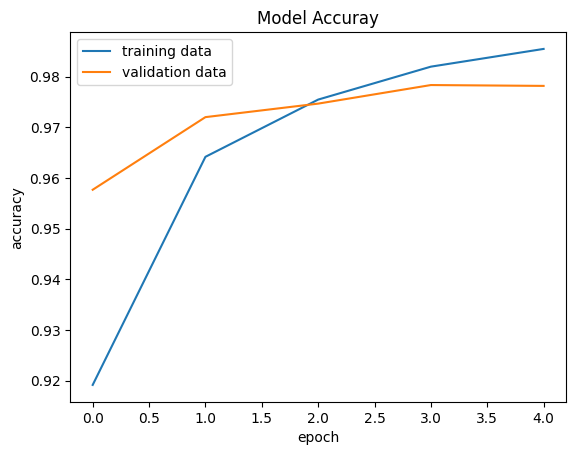

In [141]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

plt.title("Model Accuray")
plt.ylabel("accuracy")
plt.xlabel("epoch")

plt.legend(["training data", "validation data"])

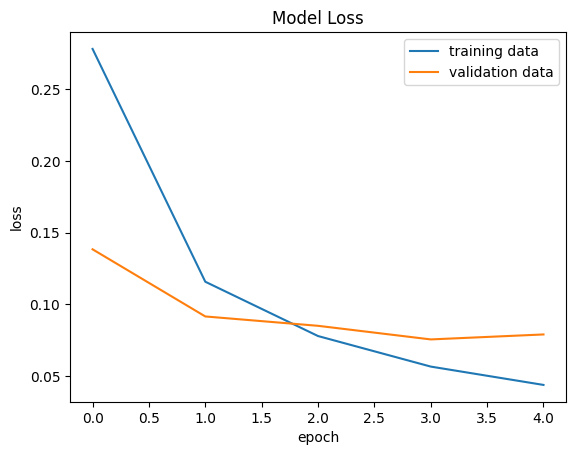

In [142]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

plt.title("Model Loss")
plt.ylabel("loss")
plt.xlabel("epoch")

plt.legend(["training data", "validation data"])

### Model evaluation

In [143]:
val_loss, val_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 644us/step - loss: 0.0838 - accuracy: 0.9751


In [144]:
print("Accuracy: {:.2f}".format(val_acc))

Accuracy: 0.98


### Prediction

In [145]:
predictions = model.predict([x_test])

313/313 [==============================] - 0s 612us/step


In [146]:
print(predictions)

[[2.75012901e-10 7.92941379e-10 1.49124912e-06 ... 9.99993205e-01
  1.61914682e-09 1.08837256e-07]
 [1.07348497e-09 5.50810182e-06 9.99993920e-01 ... 1.73364559e-10
  5.31562838e-09 3.82090227e-14]
 [2.84018000e-08 9.99933839e-01 8.10207075e-06 ... 4.83495351e-05
  4.96033499e-06 2.66409010e-08]
 ...
 [4.35211893e-12 9.80476367e-10 3.42069773e-09 ... 2.29433817e-06
  5.88775535e-08 1.07767182e-05]
 [2.49135127e-07 2.32065709e-08 6.81526036e-09 ... 8.21996593e-07
  4.52756831e-05 8.16125034e-09]
 [1.32122148e-06 1.49930812e-09 1.77417917e-07 ... 9.20122919e-12
  3.79565286e-08 4.59893235e-10]]


In [147]:
print(np.argmax(predictions[4]))

4


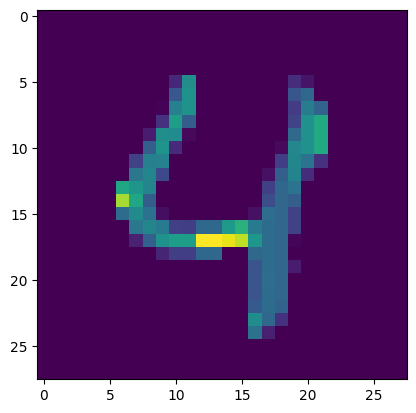

In [148]:
# check the actual image
plt.imshow(x_test[4])
plt.show()